<a href="https://colab.research.google.com/github/Swetha-Oruganti/Multi-Accent-Speech-Recognition/blob/main/dl_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task
Create a multi-accent recognition model using a CNN, loading the dataset from the "data" folder in Google Drive.

## Load data

### Subtask:
Load the audio dataset from the specified path in Google Drive.


**Reasoning**:
Import necessary libraries and define the path to the dataset in Google Drive.



In [21]:
import os
import glob

dataset_path = '/content/drive/MyDrive/data' # Replace 'data' with your actual folder name

**Reasoning**:
List the contents of the dataset directory to understand the file structure.



In [22]:
if os.path.exists(dataset_path):
    contents = os.listdir(dataset_path)
    print(f"Contents of {dataset_path}:")
    for item in contents:
        print(item)
else:
    print(f"Dataset path not found: {dataset_path}")

Contents of /content/drive/MyDrive/data:
indian_s02_708.wav
indian_s02_536.wav
indian_s02_710.wav
indian_s02_279.wav
indian_s02_487.wav
indian_s02_371.wav
indian_s02_673.wav
indian_s02_074.wav
indian_s02_031.wav
indian_s02_655.wav
indian_s02_150.wav
indian_s02_106.wav
indian_s02_582.wav
indian_s02_350.wav
indian_s02_570.wav
indian_s02_419.wav
indian_s02_189.wav
indian_s02_571.wav
indian_s02_716.wav
indian_s02_194.wav
indian_s02_638.wav
indian_s02_630.wav
indian_s02_696.wav
indian_s02_568.wav
indian_s02_186.wav
indian_s02_162.wav
indian_s02_125.wav
indian_s02_178.wav
indian_s02_313.wav
indian_s02_485.wav
indian_s02_416.wav
indian_s02_252.wav
indian_s02_314.wav
indian_s02_197.wav
indian_s02_543.wav
indian_s02_080.wav
indian_s02_121.wav
indian_s02_079.wav
indian_s02_075.wav
indian_s02_326.wav
indian_s02_436.wav
indian_s02_253.wav
indian_s02_059.wav
indian_s02_729.wav
indian_s02_328.wav
indian_s02_164.wav
indian_s02_297.wav
indian_s02_686.wav
indian_s02_096.wav
indian_s02_629.wav
indian_s0

**Reasoning**:
The previous output shows that the audio files are directly within the specified directory. Use glob to get a list of all .wav files.



In [23]:
audio_files = glob.glob(os.path.join(dataset_path, '*.wav'))
print(f"Found {len(audio_files)} audio files.")
if len(audio_files) > 5:
  print("First 5 audio files:")
  for f in audio_files[:5]:
    print(f)
else:
  print("Audio files:")
  for f in audio_files:
    print(f)

Found 12486 audio files.
First 5 audio files:
/content/drive/MyDrive/data/indian_s02_708.wav
/content/drive/MyDrive/data/indian_s02_536.wav
/content/drive/MyDrive/data/indian_s02_710.wav
/content/drive/MyDrive/data/indian_s02_279.wav
/content/drive/MyDrive/data/indian_s02_487.wav


## Preprocess data

### Subtask:
Extract relevant features from the audio data, such as MFCCs, and prepare the data for the CNN model. This may involve padding or truncating sequences and splitting the data into training and validation sets.


**Reasoning**:
Define a function to extract MFCC features and iterate through the audio files to extract features and labels. Then, determine the maximum length for padding.



In [24]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split

def extract_mfcc(file_path, n_mfcc=13, sample_rate=22050):
    try:
        y, sr = librosa.load(file_path, sr=sample_rate)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        return mfccs.T
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

features = []
labels = []
max_length = 0

for file_path in audio_files:
    mfccs = extract_mfcc(file_path, n_mfcc=n_mfcc, sample_rate=sample_rate)
    if mfccs is not None:
        features.append(mfccs)
        label = file_path.split('/')[-1].split('_')[0] # Extract accent from filename
        labels.append(label)
        if mfccs.shape[0] > max_length:
            max_length = mfccs.shape[0]

print(f"Extracted features for {len(features)} files.")
print(f"Maximum sequence length: {max_length}")

Extracted features for 12486 files.
Maximum sequence length: 1172


**Reasoning**:
Pad or truncate the extracted MFCC sequences to a fixed length, convert to NumPy arrays, and split the data into training and validation sets.



In [25]:
def pad_sequence(sequence, max_length):
    if sequence.shape[0] > max_length:
        return sequence[:max_length, :]
    elif sequence.shape[0] < max_length:
        padding = np.zeros((max_length - sequence.shape[0], sequence.shape[1]))
        return np.vstack((sequence, padding))
    else:
        return sequence

padded_features = [pad_sequence(feature, max_length) for feature in features]

X = np.array(padded_features)
y = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train: (9988, 1172, 13)
Shape of X_val: (2498, 1172, 13)
Shape of y_train: (9988,)
Shape of y_val: (2498,)


## Build cnn model

### Subtask:
Design and implement a Convolutional Neural Network (CNN) architecture suitable for accent recognition.


**Reasoning**:
Implement the CNN model architecture and compile it.



In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

input_shape = (X_train.shape[1], X_train.shape[2])
num_accents = len(np.unique(y_train))

model = Sequential([
    Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=input_shape),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_accents, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1168, 64)       │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 584, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 580, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 290, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 37120)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,751,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,797,832 (18.30 MB)

 Trainable params: 4,797,832 (18.30 MB)

 Non-trainable params: 0 (0.00 B)

## Train model

### Subtask:
Train the CNN model using the preprocessed training data.


**Reasoning**:
Import the necessary tensorflow library and train the compiled CNN model using the training and validation data, storing the history.



In [27]:
import tensorflow as tf

epochs = 20  # Example number of epochs
batch_size = 64 # Example batch size

# Convert string labels to integers
unique_labels = np.unique(y_train)
label_to_int = {label: i for i, label in enumerate(unique_labels)}
y_train_int = np.array([label_to_int[label] for label in y_train])
y_val_int = np.array([label_to_int[label] for label in y_val])


history = model.fit(X_train, y_train_int,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val_int))

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 76s 470ms/step - accuracy: 0.6508 - loss: 10.3704 - val_accuracy: 0.9432 - val_loss: 0.1723
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 474ms/step - accuracy: 0.9510 - loss: 0.1382 - val_accuracy: 0.9748 - val_loss: 0.0763
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 468ms/step - accuracy: 0.9771 - loss: 0.0599 - val_accuracy: 0.9476 - val_loss: 0.2018
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 469ms/step - accuracy: 0.9559 - loss: 0.1640 - val_accuracy: 0.9732 - val_loss: 0.0847
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 477ms/step - accuracy: 0.9887 - loss: 0.0342 - val_accuracy: 0.9748 - val_loss: 0.0979
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 72s 457ms/step - accuracy: 0.9907 - loss: 0.0239 - val_accuracy: 0.9600 - val_loss: 0.1856
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 491ms/step - accuracy: 0.9910 - loss: 0.0230 - val_accuracy: 0.9644 - val_loss: 0.1348
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 74s 474ms/step - accuracy: 0.9928 - loss: 

**Reasoning**:
The first step is to load the data from the CSV file into a pandas DataFrame and display the first few rows to understand its structure.



# Task
Build a multi-accent recognition model using CNN, train it on the dataset located at "data" in Google Drive, and test it on a single audio file.

## Evaluate model

### Subtask:
Evaluate the trained model's performance on the validation set using appropriate metrics like accuracy.


**Reasoning**:
Evaluate the trained model on the validation set and print the results.



In [32]:
loss, accuracy = model.evaluate(X_val, y_val_int, verbose=0)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Loss: 0.0748
Validation Accuracy: 0.9904


## Test on single file

### Subtask:
Load and preprocess a single audio file and use the trained model to predict its accent.


**Reasoning**:
Load and preprocess a single audio file and use the trained model to predict its accent.



In [38]:
# 1. Define the file path for a single audio file
# Choose a file from the dataset directory (e.g., the first file in the list)
test_file_path = '/content/drive/MyDrive/audio_2.wav'
print(f"Testing file: {test_file_path}")

# 2. Extract MFCC features
mfccs_test = extract_mfcc(test_file_path, n_mfcc=n_mfcc, sample_rate=sample_rate)

if mfccs_test is not None:
    # 3. Pad or truncate the extracted MFCC sequence
    padded_mfccs_test = pad_sequence(mfccs_test, max_length)

    # 4. Reshape to have a batch size of 1
    X_test_single = np.expand_dims(padded_mfccs_test, axis=0)

    # 5. Predict the accent
    predictions = model.predict(X_test_single)

    # 6. Get the index of the predicted class
    predicted_class_index = np.argmax(predictions)

    # 7. Convert the predicted class index back to the original accent label
    int_to_label = {i: label for label, i in label_to_int.items()}
    predicted_accent = int_to_label[predicted_class_index]

    # 8. Print the predicted accent, categorizing 'telugu' and 'malayalam' as 'indian'
    if predicted_accent in ['telugu', 'malayalam']:
        print(f"Predicted accent: indian and mostly is ({predicted_accent})")
    else:
        print(f"Predicted accent: {predicted_accent}")
else:
    print("Failed to extract features from the test file.")

Testing file: /content/drive/MyDrive/audio_2.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted accent: indian and mostly is (telugu)


## Model Analysis and Visualization

### Subtask:
Generate graphs to analyze the training and validation performance (e.g., loss and accuracy curves).

**Reasoning**:
Import the necessary library for plotting and create plots to visualize the training and validation accuracy and loss over epochs.

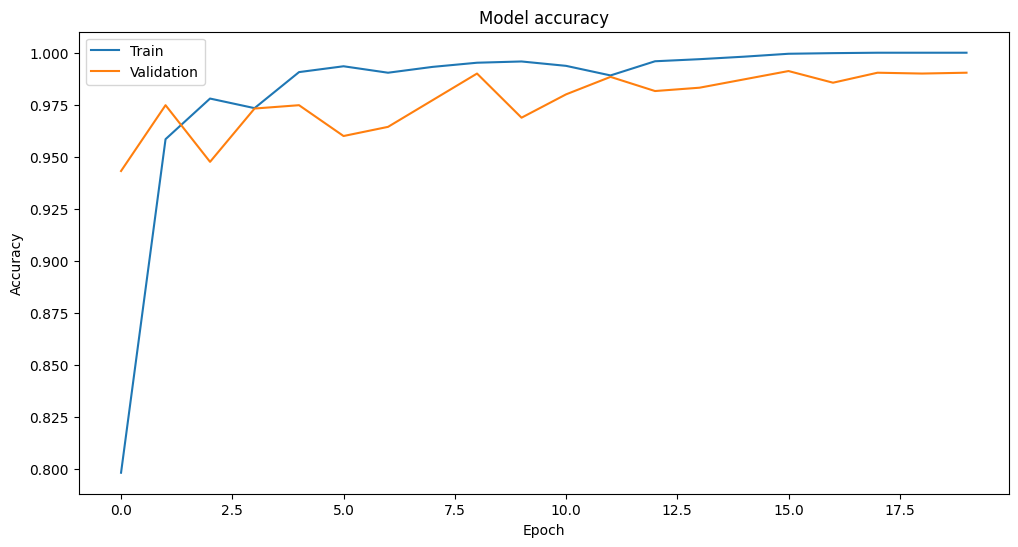

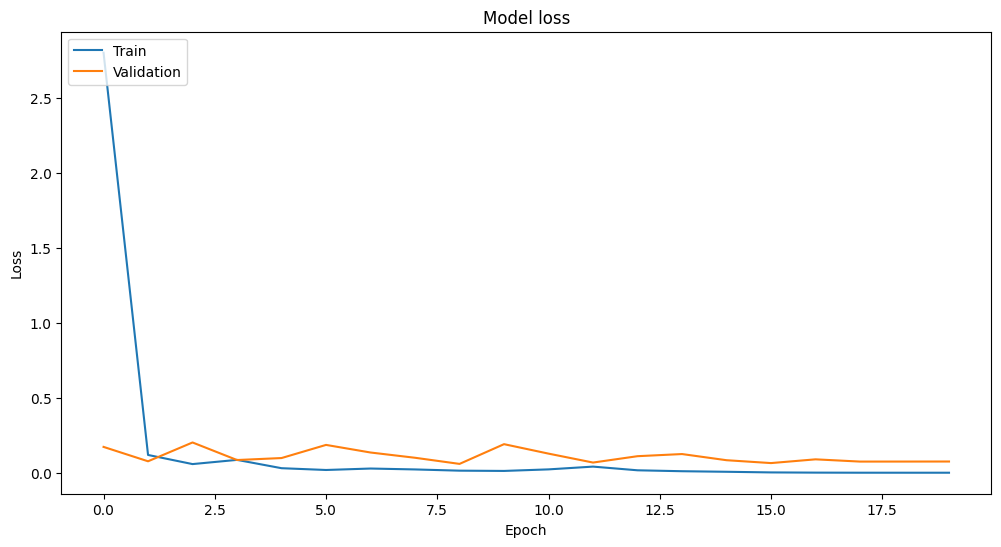

In [39]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()